In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
import seaborn as sns
from itertools import product
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
import pyLDAvis.gensim

print ('allgood')

allgood


In [ ]:
'''!wget https://assets.datacamp.com/production/repositories/2162/datasets/cc3a36b722c0806e4a7df2634e345975a0724958/chapter_1.zip
!wget https://assets.datacamp.com/production/repositories/2162/datasets/4fb6199be9b89626dcd6b36c235cbf60cf4c1631/chapter_2.zip
!wget https://assets.datacamp.com/production/repositories/2162/datasets/08cfcd4158b3a758e72e9bd077a9e44fec9f773b/chapter_3.zip
!wget https://assets.datacamp.com/production/repositories/2162/datasets/94f2356652dc9ea8f0654b5e9c29645115b6e77f/chapter_4.zip

!unzip chapter_1.zip
!unzip chapter_2.zip
!unzip chapter_3.zip
!unzip chapter_4.zip'''

In [11]:
!powershell -Command "Invoke-WebRequest -Uri 'https://assets.datacamp.com/production/repositories/2162/datasets/cc3a36b722c0806e4a7df2634e345975a0724958/chapter_1.zip' -OutFile 'chapter_1.zip'"
!powershell -Command "Invoke-WebRequest -Uri 'https://assets.datacamp.com/production/repositories/2162/datasets/4fb6199be9b89626dcd6b36c235cbf60cf4c1631/chapter_2.zip' -OutFile 'chapter_2.zip'"
!powershell -Command "Invoke-WebRequest -Uri 'https://assets.datacamp.com/production/repositories/2162/datasets/08cfcd4158b3a758e72e9bd077a9e44fec9f773b/chapter_3.zip' -OutFile 'chapter_3.zip'"
!powershell -Command "Invoke-WebRequest -Uri 'https://assets.datacamp.com/production/repositories/2162/datasets/94f2356652dc9ea8f0654b5e9c29645115b6e77f/chapter_4.zip' -OutFile 'chapter_4.zip'"

!powershell -Command "Expand-Archive -Path 'chapter_1.zip' -DestinationPath '.' -Force"
!powershell -Command "Expand-Archive -Path 'chapter_2.zip' -DestinationPath '.' -Force"
!powershell -Command "Expand-Archive -Path 'chapter_3.zip' -DestinationPath '.' -Force"
!powershell -Command "Expand-Archive -Path 'chapter_4.zip' -DestinationPath '.' -Force"

In [12]:
#data = Path.cwd() / 'data' / 'fraud_detection'
data = Path.cwd()

ch1 = data / 'chapter_1'
cc1_file = ch1 / 'creditcard_sampledata.csv'
cc3_file = ch1 / 'creditcard_sampledata_3.csv'

ch2 = data / 'chapter_2'
cc2_file = ch2 / 'creditcard_sampledata_2.csv'

ch3 = data / 'chapter_3'
banksim_file = ch3 / 'banksim.csv'
banksim_adj_file = ch3 / 'banksim_adj.csv'
db_full_file = ch3 / 'db_full.pickle'
labels_file = ch3 / 'labels.pickle'
labels_full_file = ch3 / 'labels_full.pickle'
x_scaled_file = ch3 / 'x_scaled.pickle'
x_scaled_full_file = ch3 / 'x_scaled_full.pickle'

ch4 = data / 'chapter_4'
enron_emails_clean_file = ch4 / 'enron_emails_clean.csv'
cleantext_file = ch4 / 'cleantext.pickle'
corpus_file = ch4 / 'corpus.pickle'
dict_file = ch4 / 'dict.pickle'
ldamodel_file = ch4 / 'ldamodel.pickle'

In [14]:
df = pd.read_csv(cc3_file)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5050 non-null   int64  
 1   V1          5050 non-null   float64
 2   V2          5050 non-null   float64
 3   V3          5050 non-null   float64
 4   V4          5050 non-null   float64
 5   V5          5050 non-null   float64
 6   V6          5050 non-null   float64
 7   V7          5050 non-null   float64
 8   V8          5050 non-null   float64
 9   V9          5050 non-null   float64
 10  V10         5050 non-null   float64
 11  V11         5050 non-null   float64
 12  V12         5050 non-null   float64
 13  V13         5050 non-null   float64
 14  V14         5050 non-null   float64
 15  V15         5050 non-null   float64
 16  V16         5050 non-null   float64
 17  V17         5050 non-null   float64
 18  V18         5050 non-null   float64
 19  V19         5050 non-null  

In [15]:
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
1,69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,...,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
2,96552,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,...,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0
3,281898,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,...,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0
4,86917,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,...,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0


In [16]:
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
occ

Class
0    5000
1      50
Name: count, dtype: int64

In [17]:
# Print the ratio of fraud cases
ratio_cases = occ/len(df.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')

Ratio of fraudulent cases: 0.009900990099009901
Ratio of non-fraudulent cases: 0.9900990099009901


In [18]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 2:30].values
    y = df.Class.values
    return X, y

In [19]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [20]:
# Create X and y from the prep_data function 
X, y = prep_data(df)

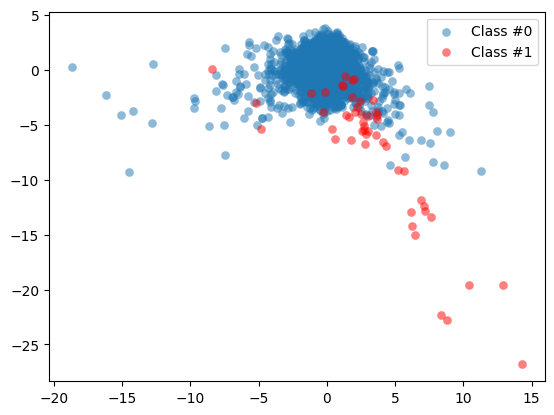

In [21]:
# Plot our data by running our plot data function on X and y
plot_data(X, y)

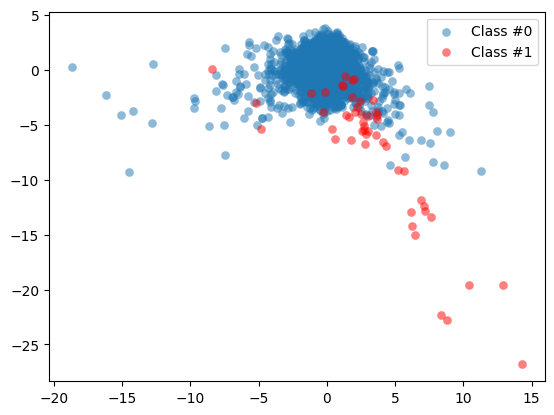

In [ ]:
# Reproduced using the DataFrame

plt.scatter(df.V2[df.Class == 0], df.V3[df.Class == 0], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(df.V2[df.Class == 1], df.V3[df.Class == 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.legend()
plt.show()

X shape: (5050, 28)
y shape: (5050,)


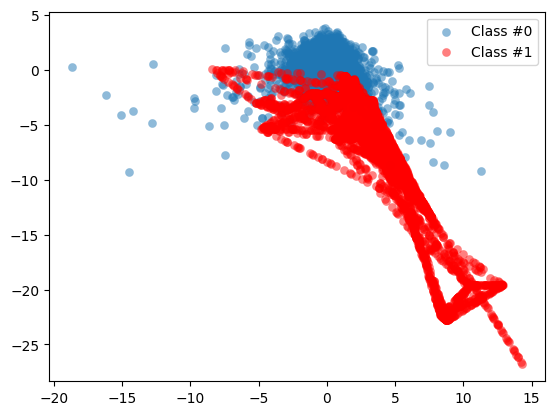

In [26]:
# SMOTE
print(f'X shape: {X.shape}\ny shape: {y.shape}')

# Define the resampling method
method = SMOTE()

# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(X, y)

# Plot the resampled data
plot_data(X_resampled, y_resampled)

In [27]:
pd.value_counts(pd.Series(y))

C:\Users\georg\AppData\Local\Temp\ipykernel_23016\3117669096.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(pd.Series(y))


0    5000
1      50
Name: count, dtype: int64

In [28]:
pd.value_counts(pd.Series(y_resampled))

C:\Users\georg\AppData\Local\Temp\ipykernel_23016\872474191.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(pd.Series(y_resampled))


0    5000
1    5000
Name: count, dtype: int64

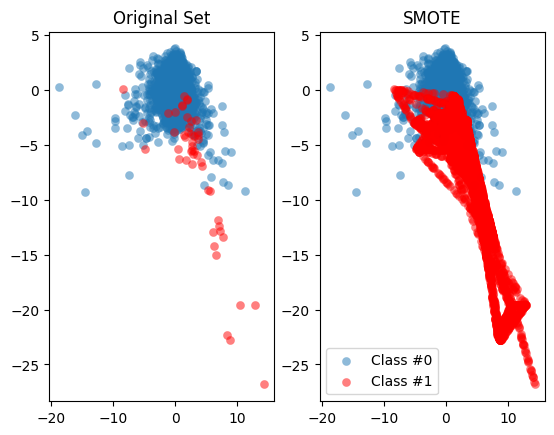

In [30]:
def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method: str):
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method)
    plt.legend()
    plt.show()

compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

In [35]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 28)
(7000,)
(3000, 28)
(3000,)


In [37]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

import torch.nn as nn
import torch.optim as optim

# Prepare data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.FloatTensor(X_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, X_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Initialize model
autoencoder = Autoencoder(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Train the autoencoder
epochs = 50
for epoch in range(epochs):
    for batch_data, _ in train_loader:
        optimizer.zero_grad()
        reconstructed = autoencoder(batch_data)
        loss = criterion(reconstructed, batch_data)
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/50], Loss: 0.5614
Epoch [20/50], Loss: 1.0441
Epoch [30/50], Loss: 1.0655
Epoch [40/50], Loss: 0.7038
Epoch [50/50], Loss: 0.5995


In [38]:
# Use the autoencoder to calculate reconstruction errors for anomaly detection
autoencoder.eval()
with torch.no_grad():
    # Get reconstruction errors for test data
    test_reconstructions = autoencoder(X_test_tensor)
    reconstruction_errors = torch.mean((X_test_tensor - test_reconstructions) ** 2, dim=1)

# Convert to numpy for further processing
reconstruction_errors_np = reconstruction_errors.numpy()

# Set threshold for anomaly detection (using percentile approach)
threshold = np.percentile(reconstruction_errors_np, 95)  # Top 5% as anomalies

# Make predictions based on threshold
y_pred = (reconstruction_errors_np > threshold).astype(int)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nThreshold used: {threshold:.4f}")
print(f"Number of anomalies detected: {np.sum(y_pred)}")
print(f"Actual number of fraud cases: {np.sum(y_test)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.99      0.69      1511
           1       0.89      0.09      0.16      1489

    accuracy                           0.54      3000
   macro avg       0.71      0.54      0.42      3000
weighted avg       0.70      0.54      0.43      3000


Confusion Matrix:
[[1494   17]
 [1356  133]]

Threshold used: 2.7963
Number of anomalies detected: 150
Actual number of fraud cases: 1489
